In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Activation , Dropout
from tensorflow.keras.callbacks import EarlyStopping 
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
dataFrame = pd.read_excel("maliciousornot.xlsx")

In [3]:
dataFrame.head()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456


In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [5]:
dataFrame.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [7]:
dataFrame.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

<Axes: xlabel='Type', ylabel='count'>

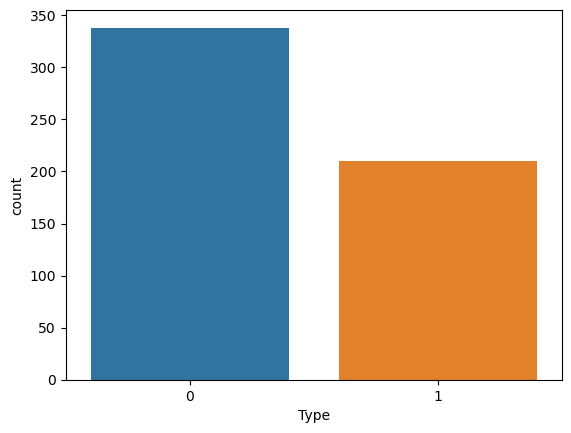

In [9]:
sbn.countplot(x="Type",data = dataFrame)

<Axes: >

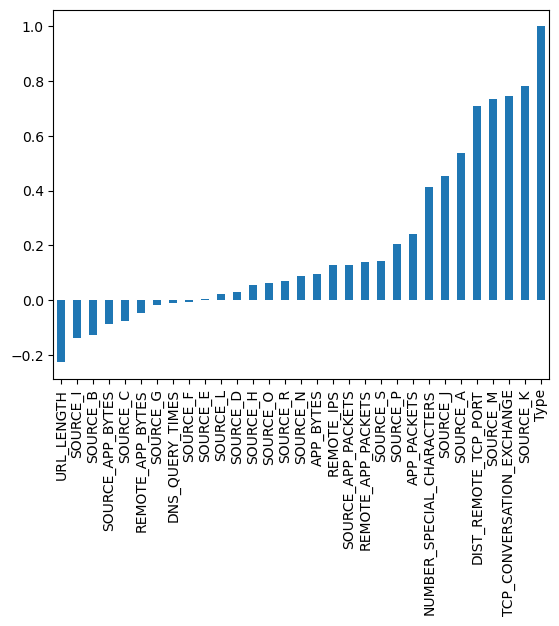

In [10]:
dataFrame.corr()["Type"].sort_values().plot(kind = "bar")

In [11]:
y = dataFrame["Type"].values
x = dataFrame.drop("Type",axis=1).values

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=15) 

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(x_train) 

MinMaxScaler()

In [18]:
x_train = scaler.transform(x_train)#Veriyi 0-1 arasındaolmasını sağlar.

In [19]:
x_test = scaler.transform(x_test)

In [26]:
x_train.shape

(383, 30)

In [29]:
model = Sequential()
model.add(Dense(units="30",activation="relu"))
model.add(Dense(units="15",activation="relu"))
model.add(Dense(units="15",activation="relu"))
model.add(Dense(units="1",activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer = "adam")

In [31]:
model.fit(x=x_train,y=y_train,epochs= 700,validation_data=(x_test,y_test),verbose = 1)

Epoch 1/700
12/12 [==============================] - 1s 14ms/step - loss: 0.6780 - val_loss: 0.6774
Epoch 2/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6571 - val_loss: 0.6634
Epoch 3/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6325 - val_loss: 0.6438
Epoch 4/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6028 - val_loss: 0.6212
Epoch 5/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5689 - val_loss: 0.5916
Epoch 6/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5304 - val_loss: 0.5566
Epoch 7/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4865 - val_loss: 0.5181
Epoch 8/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4386 - val_loss: 0.4790
Epoch 9/700
12/12 [==============================] - 0s 3ms/step - loss: 0.3884 - val_loss: 0.4314
Epoch 10/700
12/12 [==============================] - 0s 3ms/step - loss: 0.3447 - val_loss: 0.4075
Epoch 11

12/12 [==============================] - 0s 3ms/step - loss: 0.0551 - val_loss: 0.2477
Epoch 84/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0564 - val_loss: 0.2455
Epoch 85/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0565 - val_loss: 0.2600
Epoch 86/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0527 - val_loss: 0.2445
Epoch 87/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0532 - val_loss: 0.2631
Epoch 88/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0574 - val_loss: 0.2390
Epoch 89/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0559 - val_loss: 0.2649
Epoch 90/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0545 - val_loss: 0.2369
Epoch 91/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0499 - val_loss: 0.2500
Epoch 92/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0503 - val_loss: 0.2363
Epoch 93/700


12/12 [==============================] - 0s 3ms/step - loss: 0.0323 - val_loss: 0.3292
Epoch 165/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0301 - val_loss: 0.3056
Epoch 166/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0322 - val_loss: 0.3696
Epoch 167/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0356 - val_loss: 0.3049
Epoch 168/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0464 - val_loss: 0.3413
Epoch 169/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0362 - val_loss: 0.3080
Epoch 170/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0280 - val_loss: 0.3399
Epoch 171/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0350 - val_loss: 0.3053
Epoch 172/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0343 - val_loss: 0.3111
Epoch 173/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0335 - val_loss: 0.3123
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0198 - val_loss: 0.3513
Epoch 246/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0167 - val_loss: 0.3493
Epoch 247/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0210 - val_loss: 0.3601
Epoch 248/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0256 - val_loss: 0.3358
Epoch 249/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0173 - val_loss: 0.3553
Epoch 250/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0185 - val_loss: 0.3533
Epoch 251/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0159 - val_loss: 0.3345
Epoch 252/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0175 - val_loss: 0.3554
Epoch 253/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.3544
Epoch 254/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0210 - val_loss: 0.3323
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.3566
Epoch 327/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.3743
Epoch 328/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0086 - val_loss: 0.3710
Epoch 329/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.3646
Epoch 330/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.3706
Epoch 331/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.3791
Epoch 332/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.3791
Epoch 333/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.3569
Epoch 334/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0072 - val_loss: 0.3843
Epoch 335/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.3573
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.4209
Epoch 408/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.4248
Epoch 409/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.4160
Epoch 410/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.4236
Epoch 411/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.4262
Epoch 412/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.4263
Epoch 413/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.4314
Epoch 414/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.4322
Epoch 415/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.4384
Epoch 416/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.4456
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.5081
Epoch 489/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.5071
Epoch 490/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.5027
Epoch 491/700
12/12 [==============================] - 0s 3ms/step - loss: 9.9066e-04 - val_loss: 0.5089
Epoch 492/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.5102
Epoch 493/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.5077
Epoch 494/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.5072
Epoch 495/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.5106
Epoch 496/700
12/12 [==============================] - 0s 3ms/step - loss: 9.3868e-04 - val_loss: 0.5115
Epoch 497/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.5

Epoch 567/700
12/12 [==============================] - 0s 3ms/step - loss: 6.1104e-04 - val_loss: 0.5850
Epoch 568/700
12/12 [==============================] - 0s 3ms/step - loss: 6.1677e-04 - val_loss: 0.5860
Epoch 569/700
12/12 [==============================] - 0s 3ms/step - loss: 5.1810e-04 - val_loss: 0.5880
Epoch 570/700
12/12 [==============================] - 0s 3ms/step - loss: 5.0951e-04 - val_loss: 0.5877
Epoch 571/700
12/12 [==============================] - 0s 3ms/step - loss: 4.8622e-04 - val_loss: 0.5885
Epoch 572/700
12/12 [==============================] - 0s 3ms/step - loss: 4.8141e-04 - val_loss: 0.5908
Epoch 573/700
12/12 [==============================] - 0s 3ms/step - loss: 4.6681e-04 - val_loss: 0.5936
Epoch 574/700
12/12 [==============================] - 0s 3ms/step - loss: 4.9757e-04 - val_loss: 0.5931
Epoch 575/700
12/12 [==============================] - 0s 3ms/step - loss: 4.5759e-04 - val_loss: 0.5933
Epoch 576/700
12/12 [==============================] - 

12/12 [==============================] - 0s 3ms/step - loss: 2.9862e-04 - val_loss: 0.6564
Epoch 646/700
12/12 [==============================] - 0s 3ms/step - loss: 2.5783e-04 - val_loss: 0.6543
Epoch 647/700
12/12 [==============================] - 0s 3ms/step - loss: 2.6170e-04 - val_loss: 0.6575
Epoch 648/700
12/12 [==============================] - 0s 3ms/step - loss: 2.8123e-04 - val_loss: 0.6571
Epoch 649/700
12/12 [==============================] - 0s 3ms/step - loss: 2.8569e-04 - val_loss: 0.6571
Epoch 650/700
12/12 [==============================] - 0s 3ms/step - loss: 2.9404e-04 - val_loss: 0.6597
Epoch 651/700
12/12 [==============================] - 0s 3ms/step - loss: 2.4880e-04 - val_loss: 0.6618
Epoch 652/700
12/12 [==============================] - 0s 3ms/step - loss: 2.7561e-04 - val_loss: 0.6647
Epoch 653/700
12/12 [==============================] - 0s 3ms/step - loss: 2.1827e-04 - val_loss: 0.6616
Epoch 654/700
12/12 [==============================] - 0s 3ms/step - 

In [32]:
model.history.history

{'loss': [0.6780036687850952,
  0.6571199297904968,
  0.6325039267539978,
  0.6028479933738708,
  0.5689013600349426,
  0.5303540825843811,
  0.48654916882514954,
  0.43863022327423096,
  0.3884470462799072,
  0.3446728587150574,
  0.30511385202407837,
  0.2730620205402374,
  0.24513393640518188,
  0.22370892763137817,
  0.2044660449028015,
  0.19074036180973053,
  0.17921821773052216,
  0.17087313532829285,
  0.15913034975528717,
  0.15239939093589783,
  0.14854039251804352,
  0.13935716450214386,
  0.13333873450756073,
  0.12796474993228912,
  0.1238911896944046,
  0.12067294865846634,
  0.11987338215112686,
  0.11491532623767853,
  0.10932375490665436,
  0.10762454569339752,
  0.10457267612218857,
  0.10255585610866547,
  0.09857180714607239,
  0.09716572612524033,
  0.09475654363632202,
  0.09361147880554199,
  0.09113134443759918,
  0.08988003432750702,
  0.08955750614404678,
  0.08647160977125168,
  0.08467983454465866,
  0.08178099244832993,
  0.08257895708084106,
  0.0815104022

In [33]:
modelKaybi = pd.DataFrame(model.history.history)

<Axes: >

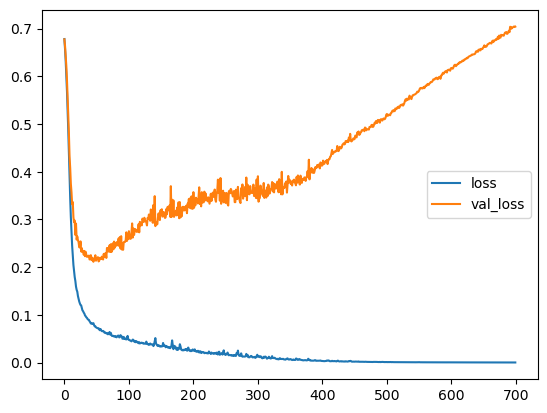

In [35]:
modelKaybi.plot()

In [36]:
model = Sequential()
model.add(Dense(units="30",activation="relu"))
model.add(Dense(units="15",activation="relu"))
model.add(Dense(units="15",activation="relu"))
model.add(Dense(units="1",activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer = "adam")

In [38]:
earlyStopping = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience = 25)

In [39]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 11ms/step - loss: 0.6854 - val_loss: 0.6761
Epoch 2/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6662 - val_loss: 0.6621
Epoch 3/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6454 - val_loss: 0.6437
Epoch 4/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6175 - val_loss: 0.6184
Epoch 5/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5835 - val_loss: 0.5875
Epoch 6/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5405 - val_loss: 0.5507
Epoch 7/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4906 - val_loss: 0.5131
Epoch 8/700
12/12 [==============================] - 0s 4ms/step - loss: 0.4375 - val_loss: 0.4685
Epoch 9/700
12/12 [==============================] - 0s 5ms/step - loss: 0.3856 - val_loss: 0.4312
Epoch 10/700
12/12 [==============================] - 0s 6ms/step - loss: 0.3404 - val_loss: 0.4031
Epoch 11

In [40]:
modelKaybi = pd.DataFrame(model.history.history)

<Axes: >

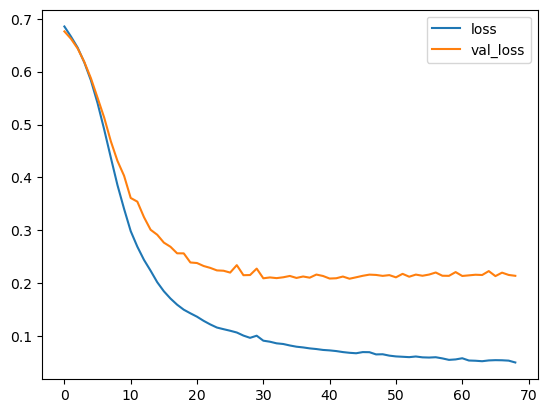

In [42]:
modelKaybi.plot()

In [43]:
model = Sequential()
model.add(Dense(units="30",activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units="15",activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units="15",activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units="1",activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer = "adam")

In [44]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 11ms/step - loss: 0.7280 - val_loss: 0.6896
Epoch 2/700
12/12 [==============================] - 0s 3ms/step - loss: 0.7032 - val_loss: 0.6877
Epoch 3/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6838 - val_loss: 0.6862
Epoch 4/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6928 - val_loss: 0.6853
Epoch 5/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6969 - val_loss: 0.6852
Epoch 6/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6743 - val_loss: 0.6840
Epoch 7/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6835 - val_loss: 0.6833
Epoch 8/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6681 - val_loss: 0.6814
Epoch 9/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6497 - val_loss: 0.6801
Epoch 10/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6808 - val_loss: 0.6783
Epoch 11

12/12 [==============================] - 0s 4ms/step - loss: 0.3321 - val_loss: 0.2834
Epoch 84/700
12/12 [==============================] - 0s 3ms/step - loss: 0.2879 - val_loss: 0.2856
Epoch 85/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2984 - val_loss: 0.2859
Epoch 86/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2667 - val_loss: 0.2682
Epoch 87/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2725 - val_loss: 0.2824
Epoch 88/700
12/12 [==============================] - 0s 3ms/step - loss: 0.2703 - val_loss: 0.2901
Epoch 89/700
12/12 [==============================] - 0s 3ms/step - loss: 0.2912 - val_loss: 0.2646
Epoch 90/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2888 - val_loss: 0.2745
Epoch 91/700
12/12 [==============================] - 0s 3ms/step - loss: 0.2687 - val_loss: 0.2824
Epoch 92/700
12/12 [==============================] - 0s 3ms/step - loss: 0.2945 - val_loss: 0.2648
Epoch 93/700


In [45]:
kayipDf = pd.DataFrame(model.history.history)

<Axes: >

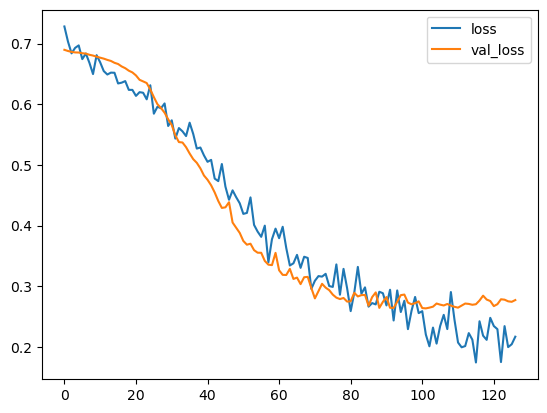

In [46]:
kayipDf.plot()

In [55]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

6/6 [==============================] - 0s 998us/step


In [56]:
classes_x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [60]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        91
           1       0.00      0.00      0.00        74

    accuracy                           0.55       165
   macro avg       0.28      0.50      0.36       165
weighted avg       0.30      0.55      0.39       165



C:\Users\emirh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\emirh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\emirh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
print(confusion_matrix(y_test,classes_x))

[[91  0]
 [74  0]]
